# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [3]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier()
}

In [6]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results[model_name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall
    }

print("Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']}, Precision = {metrics['precision']}, Recall = {metrics['recall']}")

Results:
Logistic Regression: Accuracy = 1.0, Precision = 1.0, Recall = 1.0
SVM: Accuracy = 1.0, Precision = 1.0, Recall = 1.0
Decision Tree: Accuracy = 1.0, Precision = 1.0, Recall = 1.0


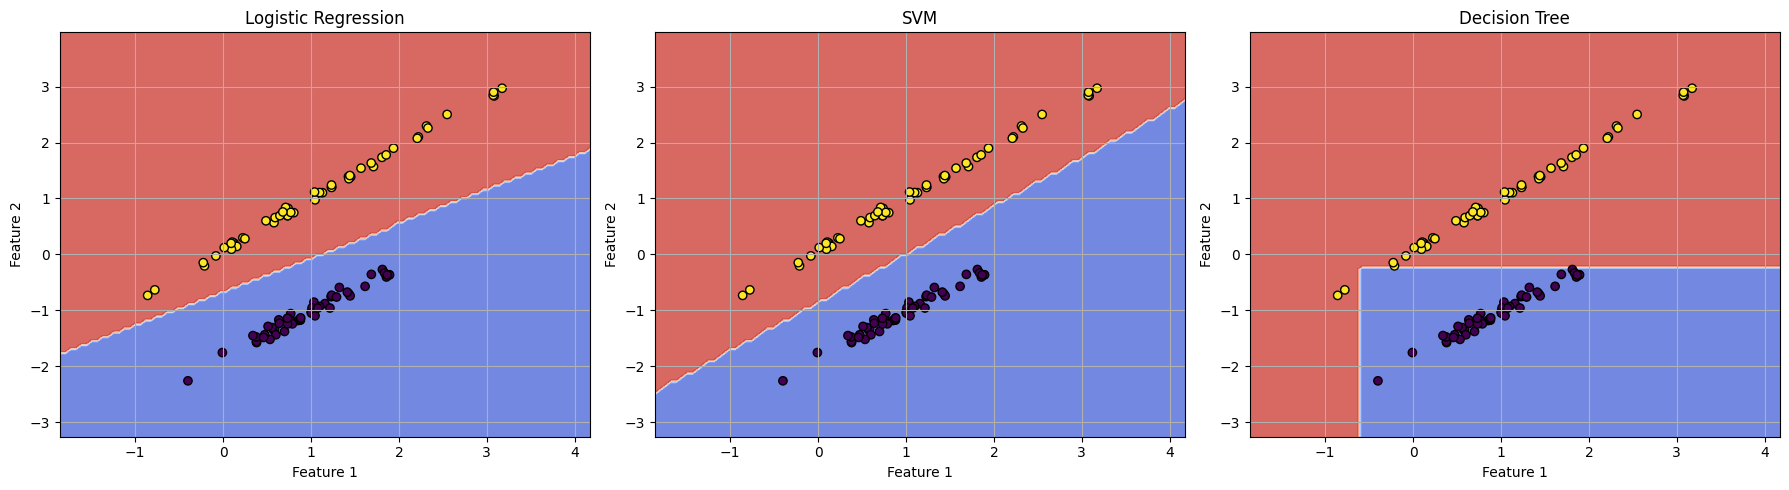

In [7]:
def plot_decision_boundaries(X, y, models):
    plt.figure(figsize=(18, 5))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    for i, (model_name, model) in enumerate(models.items()):
        plt.subplot(1, 3, i + 1)
        model.fit(X, y)  
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
        plt.title(model_name)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.grid()

    plt.tight_layout()
    plt.show()

plot_decision_boundaries(X, y, models)

**Аналіз отриманих результатів**:

1.   Усі три моделі — логістична регресія, SVM та дерево рішень — продемонстрували відмінні результати з точністю 1.0 на тестовій вибірці. Це свідчить про те, що дані є лінійно роздільними, і моделі змогли їх правильно класифікувати без жодних помилок.
2.   Моделі показали ідентичну продуктивність, що свідчить про їхню спроможність ефективно розділяти класи в лінійних умовах. 
3.   Хоча Дерево рішень досягло такої ж точності, як і логістична регресія та SVM, модель дерева рішень може бути менш стабільною через свою схильність до перенавчання.


**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [8]:
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=3, flip_y=0.1, class_sep=0.5, random_state=42)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier()
}

In [11]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    results[model_name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "predictions": y_pred
    }

In [12]:
print("Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.2f}, Precision = {metrics['precision']:.2f}, Recall = {metrics['recall']:.2f}")

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


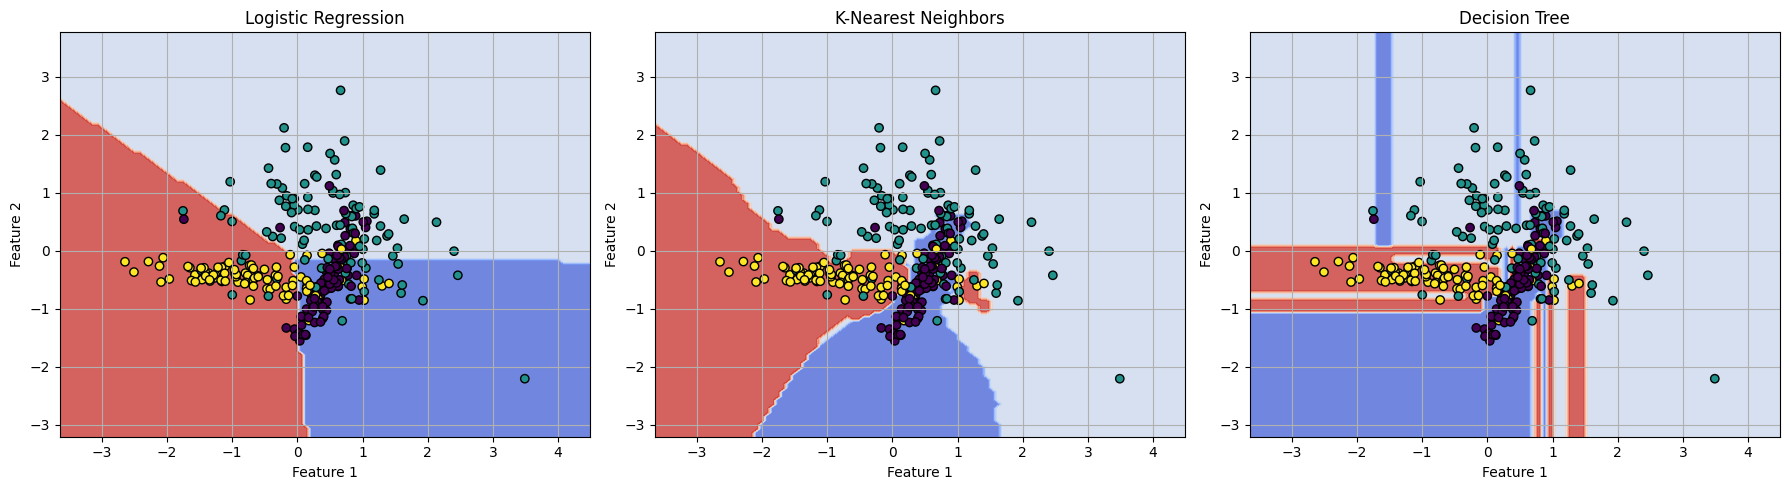

In [26]:

def plot_decision_boundaries(X, y, models):
    plt.figure(figsize=(18, 5))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    for i, (model_name, model) in enumerate(models.items()):
        plt.subplot(1, 3, i + 1)
        model.fit(X, y) 
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
        plt.title(model_name)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.grid()

    plt.tight_layout()
    plt.show()

plot_decision_boundaries(X, y, models)

**Аналіз отриманих результатів**:

1.  Логістична регресія: Ця модель показала добрі результати, зберігаючи високу точність і баланс між точністю та відгуком. Логістична регресія виявилася ефективною для лінійних кордонів
2.   K-Nearest Neighbors (KNN): Модель KNN виявилася чутливою до вибору числа сусідів (k) та до розподілу класів. Вона показала добрі результати, але в зонах, де класи перекриваються
3.   Дерево рішень: Ця модель продемонструвала схильність до перенавчання, особливо в умовах часткового перекриття класів.  



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

Results:
K-Nearest Neighbors: Accuracy = 0.99, Precision = 1.00, Recall = 0.97
Support Vector Machine: Accuracy = 0.99, Precision = 0.99, Recall = 0.99
Random Forest: Accuracy = 0.98, Precision = 0.99, Recall = 0.97


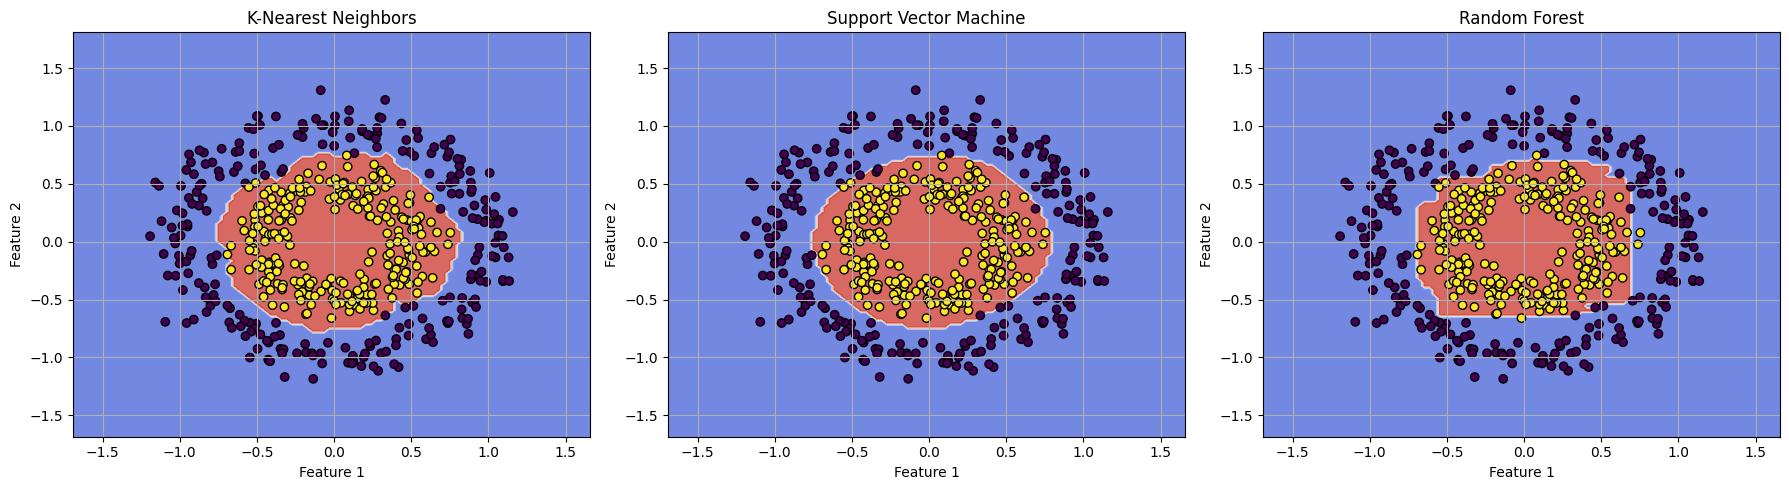

In [28]:
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', gamma='scale'),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results[model_name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "predictions": y_pred
    }

print("Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.2f}, Precision = {metrics['precision']:.2f}, Recall = {metrics['recall']:.2f}")

def plot_decision_boundaries(X, y, models):
    plt.figure(figsize=(18, 5))
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    for i, (model_name, model) in enumerate(models.items()):
        plt.subplot(1, 3, i + 1)
        model.fit(X, y)  
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
        plt.title(model_name)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.grid()

    plt.tight_layout()
    plt.show()

plot_decision_boundaries(X, y, models)

**Аналіз отриманих результатів**:

1.  K-Nearest Neighbors: Ця модель показала хорошу продуктивність завдяки своїй здатності адаптуватися до форм класів. Вона добре класифікує дані в умовах складних меж.
2.  Супорт Векторні Машини (SVM): Завдяки використанню ядра RBF, SVM змогла знайти складні межі між класами і продемонструвала високу точність.
3.  Random Forest: Ця модель продемонструвала стабільні результати завдяки своїй здатності об'єднувати рішення багатьох дерев рішень. Вона також добре справилася з складною топологією.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

Results:
K-Nearest Neighbors: Accuracy = 1.00, Precision = 1.00, Recall = 1.00
Support Vector Machine: Accuracy = 1.00, Precision = 1.00, Recall = 1.00
Decision Tree: Accuracy = 0.99, Precision = 1.00, Recall = 0.99


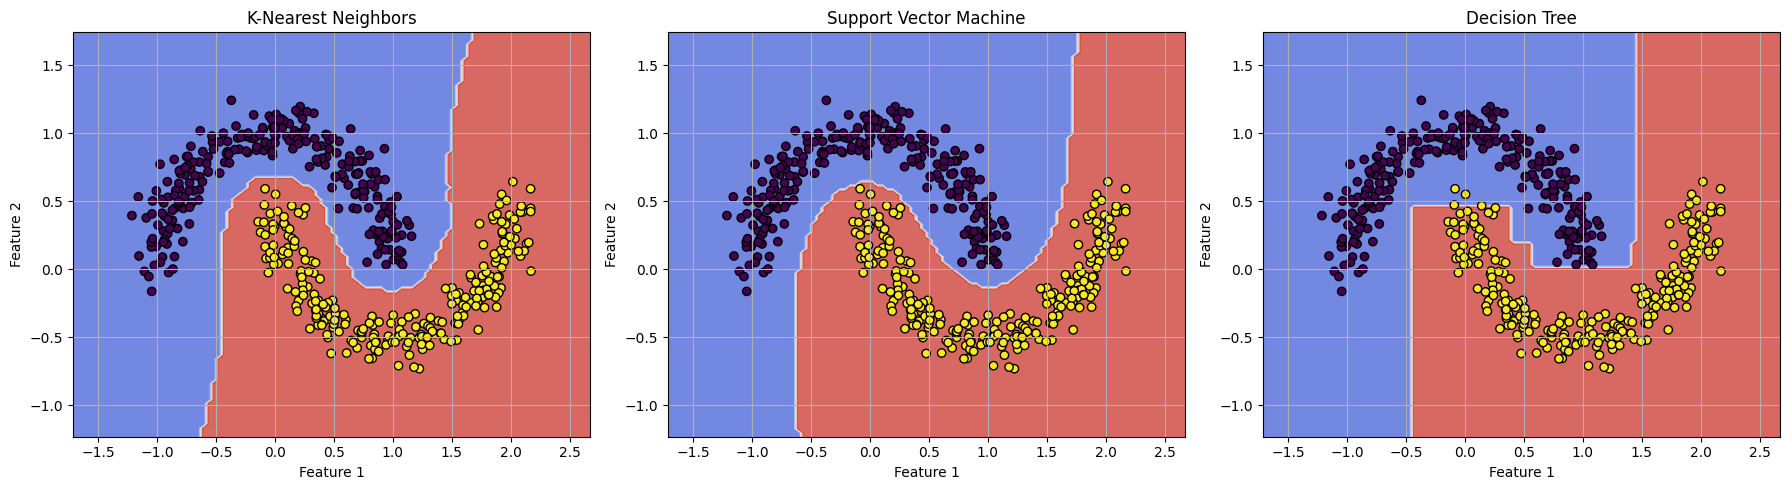

In [32]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', gamma='scale'),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results[model_name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "predictions": y_pred
    }

print("Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.2f}, Precision = {metrics['precision']:.2f}, Recall = {metrics['recall']:.2f}")

def plot_decision_boundaries(X, y, models):
    plt.figure(figsize=(18, 5))
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    for i, (model_name, model) in enumerate(models.items()):
        plt.subplot(1, 3, i + 1)
        model.fit(X, y)  
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
        plt.title(model_name)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.grid()

    plt.tight_layout()
    plt.show()

plot_decision_boundaries(X, y, models)

**Аналіз отриманих результатів**:

1.   Модель K-Nearest Neighbors показала добрі результати, оскільки вона може адаптуватися до форм класів, які не є лінійними. KNN добре класифікує дані в умовах нелінійних меж.
2.   Використання ядра RBF дозволяє SVM знаходити складні межі між класами. Ця модель часто демонструє високі показники точності в умовах нелінійних даних.
3.   Дерева рішень ефективно проводять класифікацію в таких типах даних. 